# Fréquences vocales

Le capitaine Larc du vaisseau Négoce a intercepté un message envoyé à l'aide d'un vieux téléphone. Cet appareil antique permet de composer un numéro en le codant avec des fréquences vocales (on peut les entendre).

https://www.communityofcoders.com/2021/02/dtmf-decoder-and-encoder-signals.html

Voici à quoi ça ressemble :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf
import scipy as sp

In [2]:

Nums="1234567890"
fB=[1209,1336,1477,1633]
fA=[697,770,852,941]

fs=44100
t=np.arange(fs//4)*1/fs

Fcodes={'1':(0,0),'2':(0,1),'3':(0,2),\
        '4':(1,0),'5':(1,1),'6':(1,2),\
        '7':(2,0),'8':(2,1),'9':(2,2),\
        '*':(3,0),'0':(3,1),'#':(3,2)}

def getCode(num):
    code=Fcodes[num]
    s=np.sin(2*np.pi*fA[code[0]]*t)+np.sin(2*np.pi*fB[code[1]]*t)
    return s

def playNumber(num, play=True):
    ss=[]
    ss.append(np.zeros(fs//5))
    for c in num:
        print("Play ",c)
        s=getCode(c)
        ss.append(s)
        ss.append(np.zeros(fs//5))

    s=np.concatenate(ss)
    if play:
        sd.play(s, fs)
        sd.wait()
    return s


playNumber(Nums)

Play  1
Play  2
Play  3
Play  4
Play  5
Play  6
Play  7
Play  8
Play  9
Play  0


array([0., 0., 0., ..., 0., 0., 0.])

In [3]:
# Generation du code secret
s_secret= playNumber("0741##1920", play=False)
sf.write("secret_number.wav",s_secret, fs)

Play  0
Play  7
Play  4
Play  1
Play  #
Play  #
Play  1
Play  9
Play  2
Play  0


## Exercice 

Décodez le numéro

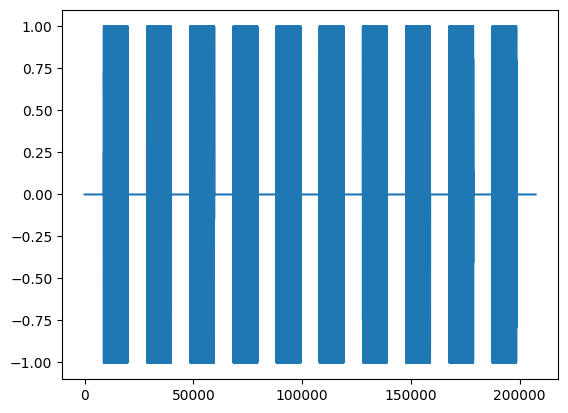

In [4]:
data, fs=sf.read("secret_number.wav")
plt.plot(data)

In [5]:
P=10 # Nombre de chiffres
N=len(data)
S=N//P # Longueur d'un sample (approximativement...)
DF=fs/S
for i in range(P):
    sub=data[range(i*S,(i+1)*S)]
    afft=np.abs(np.fft.fft(sub))
    peaks,_=sp.signal.find_peaks(afft[0:S//2], height=S/12)
    print(i,peaks*DF)

0 [ 940.42553191 1336.17021277]
1 [ 851.06382979 1208.5106383 ]
2 [ 770.21276596 1208.5106383 ]
3 [ 697.87234043 1208.5106383 ]
4 [ 940.42553191 1476.59574468]
5 [ 940.42553191 1476.59574468]
6 [ 697.87234043 1208.5106383 ]
7 [ 851.06382979 1476.59574468]
8 [ 697.87234043 1336.17021277]
9 [ 940.42553191 1336.17021277]


Les paires de fréquence permettent de retrouver les numéros :

940 / 1336 correspond à la coordonnée 3,1 dans le tableau, soit le '0'